In [1]:
import pandas as pd

from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import ConfusionMatrixDisplay

import matplotlib.pyplot as plt
%matplotlib inline

### Reading the dataset

In [2]:
rrhh_df = pd.read_csv('./data/rrhh.csv', sep = ',')

In [3]:
rrhh_df.rename(columns = { 'sales' : 'department'}, inplace = True)

In [4]:
rrhh_df.shape

(14999, 10)

In [5]:
rrhh_df.dtypes

satisfaction_level       float64
last_evaluation          float64
number_project             int64
average_montly_hours       int64
time_spend_company         int64
Work_accident              int64
left                       int64
promotion_last_5years      int64
department                object
salary                    object
dtype: object

In [6]:
rrhh_df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


### Splitting train and test datasets

In [7]:
X = rrhh_df[['satisfaction_level', 'last_evaluation', 'number_project', 'average_montly_hours', 'time_spend_company', 'Work_accident', 'left', 'promotion_last_5years']]

In [8]:
Y = rrhh_df['salary']

In [9]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.3, stratify = Y)

In [10]:
pd.Series(Y_train).value_counts(normalize = True)

low       0.487761
medium    0.429755
high      0.082484
Name: salary, dtype: float64

In [11]:
pd.Series(Y_test).value_counts(normalize = True)

low       0.487778
medium    0.429778
high      0.082444
Name: salary, dtype: float64

### Training the model

In [12]:
model = DecisionTreeClassifier(max_depth = 5)

In [13]:
model.fit(X_train, Y_train)

DecisionTreeClassifier(max_depth=5)

[Text(826.176724137931, 996.6, 'X[6] <= 0.5\ngini = 0.571\nsamples = 10499\nvalue = [866, 5121, 4512]'),
 Text(440.14655172413796, 815.4000000000001, 'X[7] <= 0.5\ngini = 0.586\nsamples = 7962\nvalue = [807, 3583, 3572]'),
 Text(230.89655172413794, 634.2, 'X[4] <= 6.5\ngini = 0.583\nsamples = 7748\nvalue = [754, 3549, 3445]'),
 Text(115.44827586206897, 453.0, 'X[0] <= 0.365\ngini = 0.581\nsamples = 7395\nvalue = [698, 3442, 3255]'),
 Text(57.724137931034484, 271.79999999999995, 'X[1] <= 0.395\ngini = 0.578\nsamples = 804\nvalue = [80, 410, 314]'),
 Text(28.862068965517242, 90.59999999999991, 'gini = 0.549\nsamples = 31\nvalue = [3, 10, 18]'),
 Text(86.58620689655173, 90.59999999999991, 'gini = 0.576\nsamples = 773\nvalue = [77, 400, 296]'),
 Text(173.17241379310346, 271.79999999999995, 'X[4] <= 5.5\ngini = 0.58\nsamples = 6591\nvalue = [618, 3032, 2941]'),
 Text(144.31034482758622, 90.59999999999991, 'gini = 0.58\nsamples = 6363\nvalue = [596, 2948, 2819]'),
 Text(202.0344827586207, 90

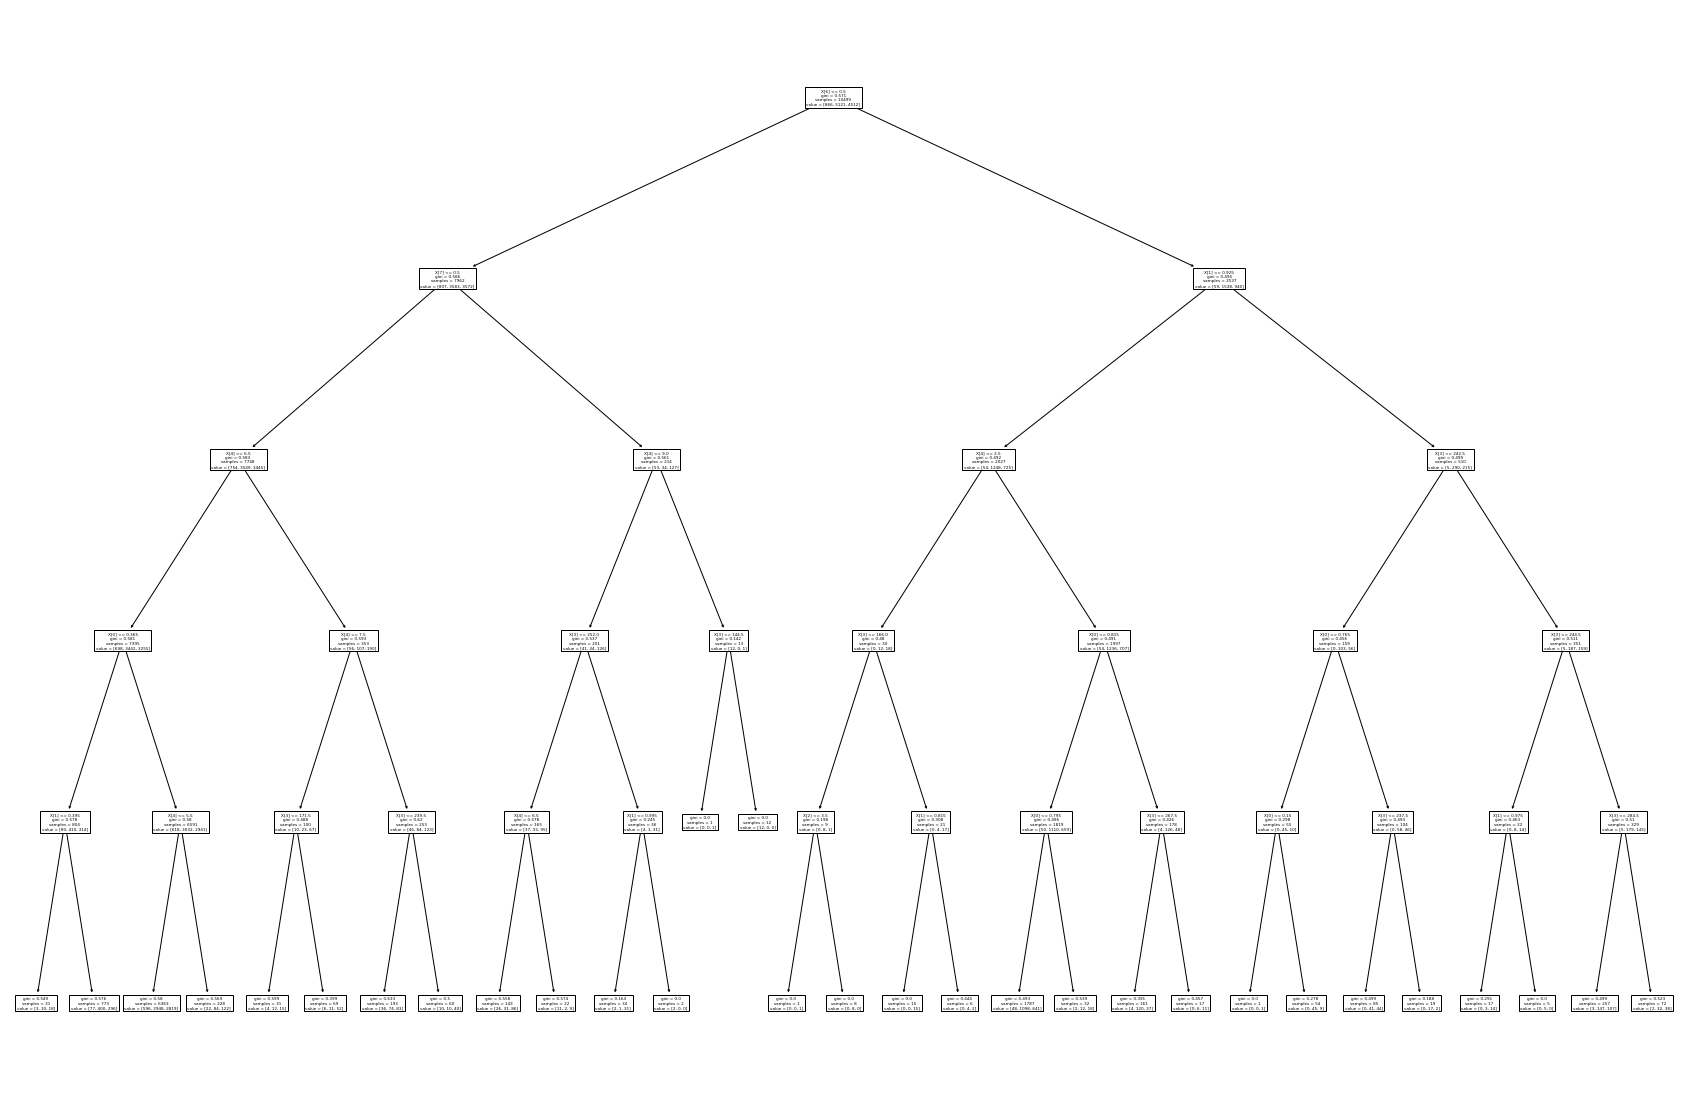

In [14]:
plt.figure(figsize = (30, 20))
plot_tree(model)

### Evaluating the model

In [15]:
predictions = model.predict(X_test)

In [16]:
ConfusionMatrixDisplay.from_predictions(Y_test, predictions)

AttributeError: type object 'ConfusionMatrixDisplay' has no attribute 'from_predictions'

### Showing class distributions among classes

In [ ]:
fig, axes = plt.subplots(nrows = 4, ncols = 2, figsize = (15, 15))
ax0, ax1, ax2, ax3, ax4, ax5, ax6, ax7 = axes.flatten()

ax0.hist(rrhh_df.loc[ rrhh_df[ 'salary' ] == 'low', 'satisfaction_level' ], label = 'Low', alpha = 0.5)
ax0.hist(rrhh_df.loc[ rrhh_df[ 'salary' ] == 'medium', 'satisfaction_level' ], label = 'Medium', alpha = 0.5)
ax0.hist(rrhh_df.loc[ rrhh_df[ 'salary' ] == 'high', 'satisfaction_level' ], label = 'High', alpha = 0.5)
ax0.set_title('Satisfaction Level')
ax0.legend()

ax1.hist(rrhh_df.loc[ rrhh_df[ 'salary' ] == 'low', 'last_evaluation' ], label = 'Low', alpha = 0.5)
ax1.hist(rrhh_df.loc[ rrhh_df[ 'salary' ] == 'medium', 'last_evaluation' ], label = 'Medium', alpha = 0.5)
ax1.hist(rrhh_df.loc[ rrhh_df[ 'salary' ] == 'high', 'last_evaluation' ], label = 'High', alpha = 0.5)
ax1.set_title('Last Evaluation')

ax2.hist(rrhh_df.loc[ rrhh_df[ 'salary' ] == 'low', 'number_project' ], label = 'Low', alpha = 0.5)
ax2.hist(rrhh_df.loc[ rrhh_df[ 'salary' ] == 'medium', 'number_project' ], label = 'Medium', alpha = 0.5)
ax2.hist(rrhh_df.loc[ rrhh_df[ 'salary' ] == 'high', 'number_project' ], label = 'High', alpha = 0.5)
ax2.set_title('Number of Projects')

ax3.hist(rrhh_df.loc[ rrhh_df[ 'salary' ] == 'low', 'average_montly_hours' ], label = 'Low', alpha = 0.5)
ax3.hist(rrhh_df.loc[ rrhh_df[ 'salary' ] == 'medium', 'average_montly_hours' ], label = 'Medium', alpha = 0.5)
ax3.hist(rrhh_df.loc[ rrhh_df[ 'salary' ] == 'high', 'average_montly_hours' ], label = 'High', alpha = 0.5)
ax3.set_title('Average Monthly Hours')

ax4.hist(rrhh_df.loc[ rrhh_df[ 'salary' ] == 'low', 'time_spend_company' ], label = 'Low', alpha = 0.5)
ax4.hist(rrhh_df.loc[ rrhh_df[ 'salary' ] == 'medium', 'time_spend_company' ], label = 'Medium', alpha = 0.5)
ax4.hist(rrhh_df.loc[ rrhh_df[ 'salary' ] == 'high', 'time_spend_company' ], label = 'High', alpha = 0.5)
ax4.set_title('Time Spend in Company')

ax5.hist(rrhh_df.loc[ rrhh_df[ 'salary' ] == 'low', 'Work_accident' ], label = 'Low', alpha = 0.5)
ax5.hist(rrhh_df.loc[ rrhh_df[ 'salary' ] == 'medium', 'Work_accident' ], label = 'Medium', alpha = 0.5)
ax5.hist(rrhh_df.loc[ rrhh_df[ 'salary' ] == 'high', 'Work_accident' ], label = 'High', alpha = 0.5)
ax5.set_title('Work Accident')

ax6.hist(rrhh_df.loc[ rrhh_df[ 'salary' ] == 'low', 'left' ], label = 'Low', alpha = 0.5)
ax6.hist(rrhh_df.loc[ rrhh_df[ 'salary' ] == 'medium', 'left' ], label = 'Medium', alpha = 0.5)
ax6.hist(rrhh_df.loc[ rrhh_df[ 'salary' ] == 'high', 'left' ], label = 'High', alpha = 0.5)
ax6.set_title('Left')

ax7.hist(rrhh_df.loc[ rrhh_df[ 'salary' ] == 'low', 'promotion_last_5years' ], label = 'Low', alpha = 0.5)
ax7.hist(rrhh_df.loc[ rrhh_df[ 'salary' ] == 'medium', 'promotion_last_5years' ], label = 'Medium', alpha = 0.5)
ax7.hist(rrhh_df.loc[ rrhh_df[ 'salary' ] == 'high', 'promotion_last_5years' ], label = 'High', alpha = 0.5)
ax7.set_title('Promotion Last 5 Years')

plt.show()